<a href="https://colab.research.google.com/github/jjain0811/Lung-and-Colon-Cancer-Detection-Using-Custom-CNN/blob/main/All_Model_Lung_Colon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import time
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from matplotlib.image import imread
import cv2
from sklearn.utils import class_weight, shuffle
import shutil
import random
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.models import Model


from keras.optimizers import RMSprop
from keras.layers import Activation,Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose, GlobalAveragePooling2D, GlobalMaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam

# **Data Preparation**

In [ ]:
# !cp "/content/drive/MyDrive/Lung+Colon.zip" /content

!cp "/content/drive/MyDrive/Data/Lung+Colon.zip" /content

In [ ]:
!unzip "/content/Lung+Colon.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Lung+Colon/val/colon_n/colonn1829.jpeg  
  inflating: Lung+Colon/val/colon_n/colonn3669.jpeg  
  inflating: Lung+Colon/val/colon_n/colonn272.jpeg  
  inflating: Lung+Colon/val/colon_n/colonn4535.jpeg  
  inflating: Lung+Colon/val/colon_n/colonn1741.jpeg  
  inflating: Lung+Colon/val/colon_n/colonn4170.jpeg  
  inflating: Lung+Colon/val/colon_n/colonn3664.jpeg  
  inflating: Lung+Colon/val/colon_n/colonn243.jpeg  
  inflating: Lung+Colon/val/colon_n/colonn542.jpeg  
  inflating: Lung+Colon/val/colon_n/colonn981.jpeg  
  inflating: Lung+Colon/val/colon_n/colonn3945.jpeg  
  inflating: Lung+Colon/val/colon_n/colonn537.jpeg  
  inflating: Lung+Colon/val/colon_n/colonn3977.jpeg  
  inflating: Lung+Colon/val/colon_n/colonn1720.jpeg  
  inflating: Lung+Colon/val/colon_n/colonn3161.jpeg  
  inflating: Lung+Colon/val/colon_n/colonn978.jpeg  
  inflating: Lung+Colon/val/colon_n/colonn2760.jpeg  
  inflating: Lung+Colon/val/colon_n/c

In [ ]:
data_dir="/content/Lung+Colon"

In [ ]:
img_shape=(256, 256, 3)
image_shape=(256, 256, 3)

In [ ]:
os.listdir(data_dir)

['train', 'val', 'test']

In [ ]:
train_dir=data_dir+"/train"

In [ ]:
Category=os.listdir(train_dir)

In [ ]:
Categories
import cv2

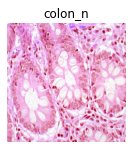

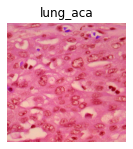

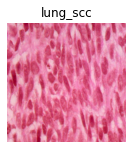

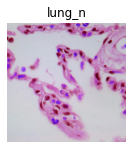

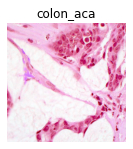

In [ ]:
for i in range(len(Category)):
  plt.figure(figsize=(20,20))
  plt.subplot(6, 8, i+1)
  image_path=train_dir+'/'+Category[i]+"/" +os.listdir(train_dir+'/'+Category[i])[1]
  img=imread(image_path)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.title(Category[i]);
  plt.axis('off')
plt.show()


In [ ]:
seed=1994
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
CATEGORIES = os.listdir(train_dir)
Ncategories = len(CATEGORIES)
labels_df = []
for category_id, category in enumerate(CATEGORIES):
    for file in os.listdir(os.path.join(train_dir, category)):
        # Solve not an image pb: ../input/dtd-r1.0.1/dtd/images/waffled/.directory
        if file == ".directory": continue
        labels_df.append(['{}/{}'.format(category, file), category, category_id])
labels_df = pd.DataFrame(labels_df, columns=['Img_name', 'Category', 'Category_id'])

labels_df.sample(n=10, random_state=seed).head(n=6)

,Img_name,Category,Category_id
4287,colon_n/colonn2795.jpeg,colon_n,1
12046,lung_aca/lungaca1149.jpeg,lung_aca,3
15375,lung_aca/lungaca2921.jpeg,lung_aca,3
1020,lung_n/lungn3624.jpeg,lung_n,0
13447,lung_aca/lungaca477.jpeg,lung_aca,3
14849,lung_aca/lungaca4065.jpeg,lung_aca,3


In [ ]:
plt.rcParams.update({'font.size': 32})

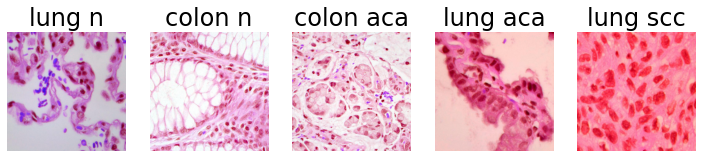

In [ ]:
Temp = labels_df.groupby('Category_id').apply(lambda x: x.sample(1))
Temp.reset_index(drop=True, inplace=True)
# _, axs = plt.subplots(n_row, n_col, figsize=(30, 30))
# axs = axs.flatten()
# for img, ax in zip(imgs, axs):
#     ax.imshow(img)
# plt.show()
plt.rcParams.update({'font.size': 5})

w=10
h=10
fig=plt.figure(figsize=(20, 20))
columns = 10
rows = 10

for i in range(Ncategories):
    plt.rcParams.update({'font.size': 20})

    plt.subplot(6, 8, i+1)
    img=imread(train_dir+'/'+Temp["Img_name"][i])
#     img = imread('{} +'/'+{}'.format(data_dir, Temp["Img_name"][i]))
    img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)
    # fig.add_subplot(rows, columns, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(" ".join("\n".join(Temp["Category"][i].split("__")).split("_")), wrap=True);
    plt.axis('off')

plt.show()

In [ ]:
  img=imread(image_path)

  plt.imshow(transform_set.random_transform(img),cmap='gray')


  # label
  plt.title(Category[1])


In [ ]:
test_dir=data_dir+"/test"

In [ ]:
val_dir=data_dir+"/val"

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
transform_set=ImageDataGenerator(
                                 rescale=1./255
                              )

In [ ]:
training_set=transform_set.flow_from_directory(train_dir,
                                               target_size=img_shape[:2],
                                              color_mode='rgb',
                                               class_mode='categorical',
                                              batch_size=30,
                                              shuffle=True)
validation_set=transform_set.flow_from_directory(val_dir,
                                               target_size=img_shape[:2],
                                              color_mode='rgb',
                                               class_mode='categorical',
                                              batch_size=30,
                                              shuffle=True)
test_set=transform_set.flow_from_directory(test_dir,
                                               target_size=img_shape[:2],
                                              color_mode='rgb',
                                               class_mode='categorical',
                                              batch_size=30,
                                              shuffle=False)

Found 20000 images belonging to 5 classes.
Found 2500 images belonging to 5 classes.
Found 2500 images belonging to 5 classes.


# **Shallow CNN Architecture**

In [ ]:
model= Sequential()

#Making Dense Network
model.add(Conv2D(8,(3,3),padding='same',input_shape=image_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

#First Layer
model.add(Conv2D(16,(3,3),padding='same',input_shape=image_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),padding='same',input_shape=image_shape))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3),padding='same',input_shape=image_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3),padding='same',input_shape=image_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same',input_shape=image_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,(3,3),padding='same',input_shape=image_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.4))


model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 256, 256, 8)       224       
_________________________________________________________________
activation_9 (Activation)    (None, 256, 256, 8)       0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 128, 128, 8)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 8)       32        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 128, 128, 16)      1168      
_________________________________________________________________
activation_10 (Activation)   (None, 128, 128, 16)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 64, 16)       

In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
Patience=2
BestModelWeightsPath = "{}_weights.best.hdf5".format(model)
checkpoint = ModelCheckpoint(
    BestModelWeightsPath,
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max',
    save_weights_only = True
)
reduceLROnPlat = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.2,
    patience=Patience,
    verbose=1,
    mode='max',
    cooldown=2,
    min_lr=1e-7
)
early = EarlyStopping(
    monitor="val_accuracy",
    mode="max",
    patience=Patience*2,
    restore_best_weights=True
)
callbacks_list= [checkpoint, early, reduceLROnPlat]


In [ ]:
history_CNN=model.fit_generator(
training_set,
steps_per_epoch=training_set.samples//training_set.batch_size,
epochs=100,
callbacks=callbacks_list,
validation_data=validation_set, validation_steps=validation_set.samples//validation_set.batch_size,
verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
666/666 [==============================] - 195s 288ms/step - loss: 0.6828 - accuracy: 0.6749 - val_loss: 0.9645 - val_accuracy: 0.6502

Epoch 00001: val_accuracy improved from -inf to 0.65020, saving model to <keras.engine.sequential.Sequential object at 0x7f01b01d6110>_weights.best.hdf5
Epoch 2/100
666/666 [==============================] - 186s 280ms/step - loss: 0.2017 - accuracy: 0.9198 - val_loss: 0.7772 - val_accuracy: 0.7137

Epoch 00002: val_accuracy improved from 0.65020 to 0.71365, saving model to <keras.engine.sequential.Sequential object at 0x7f01b01d6110>_weights.best.hdf5
Epoch 3/100
666/666 [==============================] - 187s 281ms/step - loss: 0.1448 - accuracy: 0.9451 - val_loss: 0.1441 - val_accuracy: 0.9442

Epoch 00003: val_accuracy improved from 0.71365 to 0.94418, saving model to <keras.engine.sequential.Sequential object at 0x7f01b01d6110>_weights.best.hdf5
Epoch 4/100
666/666 [==============================] - 188s 282ms/step - loss: 0.1118 - acc

In [ ]:
model.save("CNNcompressLungColon.h5")

In [ ]:
import pandas as pd
metrics = pd.DataFrame(history_CNN.history)
metrics

,loss,accuracy,val_loss,val_accuracy,lr
0,0.473084,0.781522,0.964546,0.650201,0.001000
1,0.185895,0.927742,0.777218,0.713655,0.001000
2,0.136237,0.947071,0.144088,0.944177,0.001000
3,0.111999,0.958087,0.093291,0.965060,0.001000
4,0.091845,0.965548,0.098847,0.963855,0.001000
5,0.084821,0.969755,0.195082,0.928514,0.001000
6,0.032932,0.988633,0.025062,0.993173,0.000200
7,0.019584,0.993040,0.054374,0.981526,0.000200
8,0.014325,0.994842,0.024571,0.989960,0.000200
9,0.009743,0.996745,0.018656,0.995984,0.000040


In [ ]:
pred=model.predict(test_set)

In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)
predicted_class_indices

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_set.classes, predicted_class_indices))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500
           2       0.99      0.97      0.98       500
           3       1.00      1.00      1.00       500
           4       0.97      0.99      0.98       500

    accuracy                           0.99      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       0.99      0.99      0.99      2500



In [ ]:
confusion=confusion_matrix(test_set.classes,predicted_class_indices)

confusion

array([[500,   0,   0,   0,   0],
       [  1, 499,   0,   0,   0],
       [  0,   0, 487,   0,  13],
       [  0,   0,   0, 500,   0],
       [  0,   0,   4,   0, 496]])

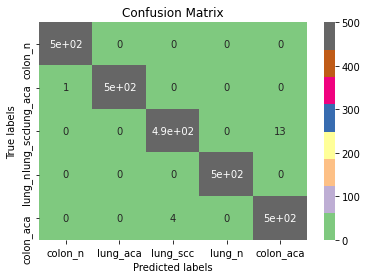

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax,cmap='Accent'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(os.listdir(train_dir)); ax.yaxis.set_ticklabels(os.listdir(train_dir));

In [ ]:
score=model.evaluate(test_set,steps=test_set.samples//10)[1]

250/250 [==============================] - 20s 80ms/step - loss: 0.0233 - accuracy: 0.9928


# **Efficient Net Architecture**

In [ ]:
!unrar x efficientnet.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from efficientnet.rar

Creating    efficientnet                                              OK
Extracting  efficientnet/keras.py                                          2%  OK 
Extracting  efficientnet/model.py                                         57%  OK 
Extracting  efficientnet/preprocessing.py                                 66%  OK 
Extracting  efficientnet/tfkeras.py                                       68%  OK 
Extracting  efficientnet/weights.py                                       82%  OK 
Extracting  efficientnet/__init__.py                                      92%  OK 
Extracting  efficientnet/__version__.py                                   98%  OK 
All OK


In [ ]:
!pip install -U efficientnet
from efficientnet.keras import EfficientNetB0

     |████████████████████████████████| 51kB 7.9MB/s 


In [ ]:
base_model = EfficientNetB0(input_shape=(256,256,3), include_top=False, weights='imagenet')
base_model.trainable = False
base_model.summary()

16818176/16804768 [==============================] - 0s 0us/step
Model: "efficientnet-b0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 128, 128, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 128, 128, 32) 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 128, 128, 32) 0           stem_bn[0][0]                    
___________________

In [ ]:
x = GlobalAveragePooling2D()(base_model.output)
x = BatchNormalization()(x)
outputs = Dense(5, activation="softmax",)(x)

model_eff= Model(base_model.input, outputs)
model_eff.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 128, 128, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 128, 128, 32) 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 128, 128, 32) 0           stem_bn[0][0]                    
______________________________________________________________________________________________

In [ ]:
model_eff.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])

In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
Patience=2
BestModelWeightsPath = "{}_model.best.h5".format(model_eff)
checkpoint = ModelCheckpoint(
    BestModelWeightsPath,
    monitor='val_acc',
    verbose=1,
    save_best_only=True,
    mode='max',
    save_weights_only = False,
)
reduceLROnPlat = ReduceLROnPlateau(
    monitor='val_acc',
    factor=0.5,
    patience=1,
    verbose=1,
    mode='max',
    cooldown=2,
    min_lr=0.000001
)
early = EarlyStopping(
    monitor="val_acc",
    mode="max",
    patience=Patience*3,
    restore_best_weights=True
)
callbacks_list_final= [checkpoint, early, reduceLROnPlat]

In [ ]:
classification = model_eff.fit(training_set,
steps_per_epoch=training_set.samples//training_set.batch_size,
epochs=100,
callbacks=callbacks_list_final,
validation_data=validation_set, validation_steps=validation_set.samples//validation_set.batch_size,
verbose=1)

Epoch 1/100
666/666 [==============================] - 222s 312ms/step - loss: 0.3405 - acc: 0.8791 - val_loss: 0.0741 - val_acc: 0.9727

Epoch 00001: val_acc improved from -inf to 0.97269, saving model to <keras.engine.functional.Functional object at 0x7f009333f790>_model.best.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/100
666/666 [==============================] - 201s 301ms/step - loss: 0.0935 - acc: 0.9673 - val_loss: 0.0486 - val_acc: 0.9811

Epoch 00002: val_acc improved from 0.97269 to 0.98112, saving model to <keras.engine.functional.Functional object at 0x7f009333f790>_model.best.h5
Epoch 3/100
666/666 [==============================] - 200s 300ms/step - loss: 0.0712 - acc: 0.9743 - val_loss: 0.0502 - val_acc: 0.9807

Epoch 00003: val_acc did not improve from 0.98112

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/100
666/666 [==============================] - 198s 297ms/step - loss: 0.0663 - acc: 0.9759 - val_loss: 0.0366 - val_acc: 0.9876

Epoch 00004: val_acc improved from 0.98112 to 0.98755, saving model to <keras.engine.functional.Functional object at 0x7f009333f790>_model.best.h5
Epoch 5/100
666/666 [==============================] - 198s 298ms/step - loss: 0.0588 - acc: 0.9785 - val_loss: 0.0398 - val_acc: 0.9855

Epoch 00005: val_acc di

In [ ]:
model_eff.save("Efficient_LungColon.h5")

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
import pandas as pd
metrics = pd.DataFrame(classification.history)
metrics

,loss,acc,val_loss,val_acc,lr
0,0.188683,0.934001,0.074147,0.972691,0.001000
1,0.090848,0.968002,0.048622,0.981125,0.001000
2,0.073223,0.973060,0.050188,0.980723,0.001000
3,0.061429,0.977767,0.036630,0.987550,0.000500
4,0.057120,0.979670,0.039848,0.985542,0.000500
5,0.051928,0.981322,0.031163,0.989157,0.000250
6,0.050232,0.982674,0.028825,0.991968,0.000250
7,0.051653,0.981723,0.031733,0.989558,0.000250
8,0.046812,0.984176,0.027227,0.993574,0.000125
9,0.048805,0.982524,0.027451,0.991968,0.000125


In [ ]:
pred=model_eff.predict(test_set)

In [ ]:
test_set.classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)
predicted_class_indices

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_set.classes, predicted_class_indices))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500
           2       0.98      0.99      0.98       500
           3       1.00      1.00      1.00       500
           4       0.99      0.98      0.98       500

    accuracy                           0.99      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       0.99      0.99      0.99      2500



In [ ]:
confusion=confusion_matrix(test_set.classes,predicted_class_indices)

confusion

array([[500,   0,   0,   0,   0],
       [  1, 499,   0,   0,   0],
       [  0,   0, 493,   0,   7],
       [  0,   0,   0, 500,   0],
       [  0,   0,  10,   0, 490]])

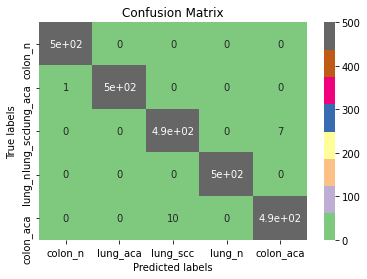

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax,cmap='Accent'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(os.listdir(train_dir)); ax.yaxis.set_ticklabels(os.listdir(train_dir));

In [ ]:
score=model_eff.evaluate(test_set,steps=test_set.samples//test_set.batch_size)[1]

83/83 [==============================] - 22s 263ms/step - loss: 0.0232 - acc: 0.9928


# **Data Visualization**

In [ ]:
result=[]
result.append(history_CNN.history['accuracy'])
result.append(classification.history['acc'])

In [ ]:
result_=[]
result_.append(history_CNN.history['loss'])
result_.append(classification.history['loss'])

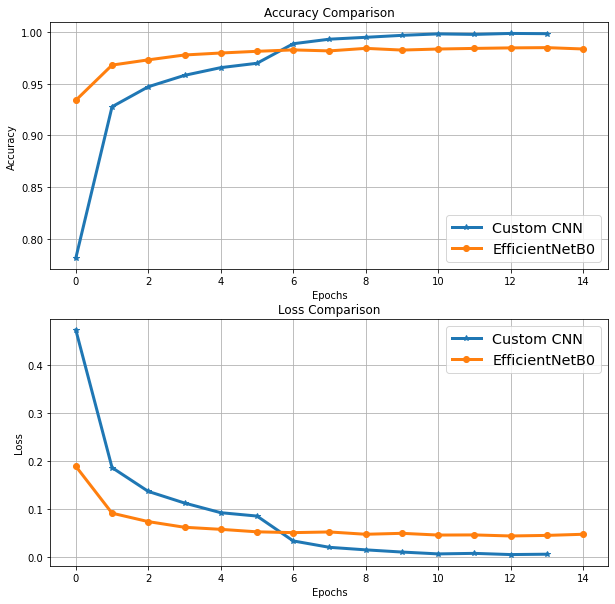

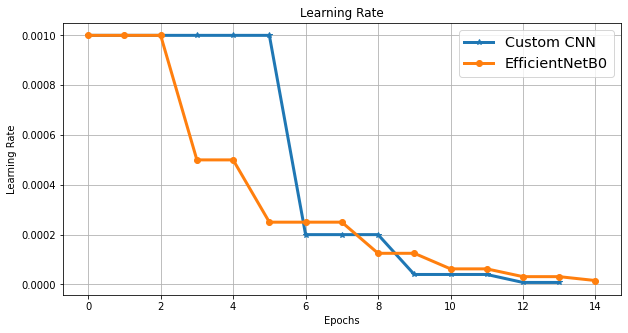

In [ ]:
lw=3
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(result[0], label = 'Custom CNN', marker = '*', linewidth = lw)
plt.plot(result[1], label = 'EfficientNetB0', marker = 'o', linewidth = lw)
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(fontsize = 'x-large')


plt.subplot(2,1,2)
plt.plot(result_[0], label = 'Custom CNN', marker = '*', linewidth = lw)
plt.plot(result_[1], label = 'EfficientNetB0', marker = 'o', linewidth = lw)
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(fontsize = 'x-large')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history_CNN.history['lr'], label = 'Custom CNN', marker = '*',linewidth = lw)
plt.plot(classification.history['lr'], label = 'EfficientNetB0', marker = 'o',linewidth = lw)
plt.title('Learning Rate')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.legend(fontsize = 'x-large')
plt.grid(True)
plt.show()